# **TD3 : Analyse des Données Textuelles en Python pour le NLP**

Objectifs du TD
- Explorer des méthodes d’analyse des données textuelles. 
- Visualiser des informations clés (fréquences, nuages de mots). 
- Utiliser des outils pour effectuer une analyse de sentiment. 
- Durée : 1h30 

Prérequis 
- Données textuelles nettoyées à partir du TD précédent. 
- Python 3.7+ 
- Bibliothèques nécessaires : Pandas, Matplotlib, WordCloud, TextBlob.

Source code : 

* https://stacklima.com/programme-python-pour-le-mot-le-plus-frequent-dans-la-liste-des-chaines/

* https://statorials.org/frequence-relative-python/

* https://ichi.pro/fr/generer-un-nuage-de-mots-en-python-87142636483046

* https://python.19633.com/fr/Python/1001001889.html

In [57]:
pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 162.5 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 217.9 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 297.7 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 462.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 187.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 328.2 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 403.5 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.2 kB 737.3 kB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 965.4 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 887.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**1. Exploration statistique**

Dans cette section, nous allons explorer les données textuelles nettoyées pour en extraire des informations clés comme les fréquences de mots.

**Étapes à suivre :**  
- Charger les données nettoyées depuis un fichier CSV. 
- Identifier les mots les plus fréquents en utilisant une bibliothèque d’analyse de texte. 
- Calculer les statistiques de base sur les fréquences des mots.

In [13]:
import pandas as pd 
data = pd.read_csv("processed_texts.csv")

In [14]:
print(data)

     Original Word Stemmed Word
0             Deep         deep
1         Learning        learn
2              and          and
3          Medical        medic
4            Image         imag
...            ...          ...
2012       Careers       career
2013           NLM          nlm
2014           NIH          nih
2015           HHS           hh
2016       USA.gov      usa.gov

[2017 rows x 2 columns]


In [29]:
print("Number of Words: ", len(test_list)) # affiche le nombre de mots 

Number of Words:  2017


In [16]:
# CODE POUR BIEN COMPRENDRE LE FONCTIONNEMENT 
from collections import defaultdict # spécifie une valeur par défaut pour les clés inexistantes pour éviter des erreurs

test_list = ["gfg is best for geeks", "geeks love gfg", "gfg is best"] # exemple de liste 
 
# afficher la liste originale 
print("The original list is : " + str(test_list))
 
temp = defaultdict(int) # dictionnaire temp : si une clé n'existe pas alors elle sera automatiquement initialisée à 0 
 
# comptage des mots dans chaque phrase 
for sub in test_list:
    for wrd in sub.split(): # sépare chaque phrase en mots individuels
        temp[wrd] += 1 # ajoute 1 à la valeur associé à la clé, si pas encore vu initialisé à 0 et incrémenté à 1
 
# obtention de la freq max des mots 
res = max(temp, key=temp.get)
 
# afficher les résultats 
print("Le maximum de fréquence : " + str(res))

The original list is : ['gfg is best for geeks', 'geeks love gfg', 'gfg is best']
Word with maximum frequency : gfg


In [19]:
# initialisation de la colonne d'interêt 
test_list= data['Stemmed Word'].tolist()
print(test_list)

['deep', 'learn', 'and', 'medic', 'imag', 'analysi', 'for', 'covid-19', 'diagnosi', 'and', 'predict', '-', 'pubm', 'thi', 'site', 'need', 'javascript', 'to', 'work', 'properli', '.', 'pleas', 'enabl', 'it', 'to', 'take', 'advantag', 'of', 'the', 'complet', 'set', 'of', 'featur', '!', 'clipboard', ',', 'search', 'histori', ',', 'and', 'sever', 'other', 'advanc', 'featur', 'are', 'temporarili', 'unavail', '.', 'skip', 'to', 'main', 'page', 'content', 'an', 'offici', 'websit', 'of', 'the', 'unit', 'state', 'govern', 'here', "'s", 'how', 'you', 'know', 'the', '.gov', 'mean', 'it', '’', 's', 'offici', '.', 'feder', 'govern', 'websit', 'often', 'end', 'in', '.gov', 'or', '.mil', '.', 'befor', 'share', 'sensit', 'inform', ',', 'make', 'sure', 'you', '’', 're', 'on', 'a', 'feder', 'govern', 'site', '.', 'the', 'site', 'is', 'secur', '.', 'the', 'http', ':', '//', 'ensur', 'that', 'you', 'are', 'connect', 'to', 'the', 'offici', 'websit', 'and', 'that', 'ani', 'inform', 'you', 'provid', 'is', 'e

In [21]:
# CODE ADAPTE A MA DATA 
from collections import defaultdict # spécifie une valeur par défaut pour les clés inexistantes pour éviter des erreurs

# afficher la liste originale 
print("The original list is : " + str(test_list))
 
temp = defaultdict(int) # dictionnaire temp : si une clé n'existe pas alors elle sera automatiquement initialisée à 0 
 
# comptage des mots dans la liste
for wrd in test_list:
    temp[wrd] += 1  # On incrémente la fréquence de chaque mot

 
# obtention de la freq max des mots 
res = max(temp, key=temp.get)
 
# vu que j'ai séparer par mots et pas par phrase voilà les occurrences de chaque mot
print("\nLes occurrences de chaque mot :")
for word, count in temp.items():
    print(f"{word}: {count}")

The original list is : ['deep', 'learn', 'and', 'medic', 'imag', 'analysi', 'for', 'covid-19', 'diagnosi', 'and', 'predict', '-', 'pubm', 'thi', 'site', 'need', 'javascript', 'to', 'work', 'properli', '.', 'pleas', 'enabl', 'it', 'to', 'take', 'advantag', 'of', 'the', 'complet', 'set', 'of', 'featur', '!', 'clipboard', ',', 'search', 'histori', ',', 'and', 'sever', 'other', 'advanc', 'featur', 'are', 'temporarili', 'unavail', '.', 'skip', 'to', 'main', 'page', 'content', 'an', 'offici', 'websit', 'of', 'the', 'unit', 'state', 'govern', 'here', "'s", 'how', 'you', 'know', 'the', '.gov', 'mean', 'it', '’', 's', 'offici', '.', 'feder', 'govern', 'websit', 'often', 'end', 'in', '.gov', 'or', '.mil', '.', 'befor', 'share', 'sensit', 'inform', ',', 'make', 'sure', 'you', '’', 're', 'on', 'a', 'feder', 'govern', 'site', '.', 'the', 'site', 'is', 'secur', '.', 'the', 'http', ':', '//', 'ensur', 'that', 'you', 'are', 'connect', 'to', 'the', 'offici', 'websit', 'and', 'that', 'ani', 'inform', 'y

In [30]:
print(temp) # dictionniare (mot, fréquence) qui affiche les mots avec leurs fréquences incrémentées 

defaultdict(<class 'int'>, {'deep': 15, 'learn': 17, 'and': 32, 'medic': 8, 'imag': 17, 'analysi': 6, 'for': 9, 'covid-19': 16, 'diagnosi': 5, 'predict': 7, '-': 5, 'pubm': 19, 'thi': 2, 'site': 3, 'need': 2, 'javascript': 1, 'to': 38, 'work': 1, 'properli': 1, '.': 108, 'pleas': 3, 'enabl': 1, 'it': 2, 'take': 1, 'advantag': 1, 'of': 35, 'the': 27, 'complet': 1, 'set': 3, 'featur': 2, '!': 1, 'clipboard': 6, ',': 112, 'search': 39, 'histori': 1, 'sever': 3, 'other': 2, 'advanc': 2, 'are': 4, 'temporarili': 1, 'unavail': 1, 'skip': 1, 'main': 3, 'page': 2, 'content': 2, 'an': 6, 'offici': 3, 'websit': 3, 'unit': 3, 'state': 1, 'govern': 3, 'here': 1, "'s": 2, 'how': 1, 'you': 5, 'know': 1, '.gov': 2, 'mean': 1, '’': 2, 's': 8, 'feder': 2, 'often': 1, 'end': 1, 'in': 34, 'or': 2, '.mil': 1, 'befor': 1, 'share': 2, 'sensit': 1, 'inform': 10, 'make': 1, 'sure': 1, 're': 5, 'on': 4, 'a': 16, 'is': 3, 'secur': 2, 'http': 1, ':': 61, '//': 1, 'ensur': 1, 'that': 3, 'connect': 2, 'ani': 2, 'p

In [42]:
# fmax
max_freq_word = max(temp, key=temp.get)
print(f"Le mot avec la fréquence maximale est '{max_freq_word}' avec {temp[max_freq_word]} occurrences.")

# Mot le moins fréquent
min_freq_word = min(temp, key=temp.get)
print(f"Le mot le moins fréquent est '{min_freq_word}' avec {temp[min_freq_word]} occurrence.")

Le mot avec la fréquence maximale est ',' avec 112 occurrences.
Le mot le moins fréquent est 'javascript' avec 1 occurrence.


In [44]:
# calcul des fréq relatives = rel_freq
total_words = sum(temp.values())
relative_frequencies = {word: (count / total_words) * 100 for word, count in temp.items()}

# Afficher les résultats
print("\nFréquences relatives des mots :")
for word, rel_freq in relative_frequencies.items():
    print(f"{word}: {rel_freq:.2f}%")


Fréquences relatives des mots :
deep: 0.74%
learn: 0.84%
and: 1.59%
medic: 0.40%
imag: 0.84%
analysi: 0.30%
for: 0.45%
covid-19: 0.79%
diagnosi: 0.25%
predict: 0.35%
-: 0.25%
pubm: 0.94%
thi: 0.10%
site: 0.15%
need: 0.10%
javascript: 0.05%
to: 1.88%
work: 0.05%
properli: 0.05%
.: 5.35%
pleas: 0.15%
enabl: 0.05%
it: 0.10%
take: 0.05%
advantag: 0.05%
of: 1.74%
the: 1.34%
complet: 0.05%
set: 0.15%
featur: 0.10%
!: 0.05%
clipboard: 0.30%
,: 5.55%
search: 1.93%
histori: 0.05%
sever: 0.15%
other: 0.10%
advanc: 0.10%
are: 0.20%
temporarili: 0.05%
unavail: 0.05%
skip: 0.05%
main: 0.15%
page: 0.10%
content: 0.10%
an: 0.30%
offici: 0.15%
websit: 0.15%
unit: 0.15%
state: 0.05%
govern: 0.15%
here: 0.05%
's: 0.10%
how: 0.05%
you: 0.25%
know: 0.05%
.gov: 0.10%
mean: 0.05%
’: 0.10%
s: 0.40%
feder: 0.10%
often: 0.05%
end: 0.05%
in: 1.69%
or: 0.10%
.mil: 0.05%
befor: 0.05%
share: 0.10%
sensit: 0.05%
inform: 0.50%
make: 0.05%
sure: 0.05%
re: 0.25%
on: 0.20%
a: 0.79%
is: 0.15%
secur: 0.10%
http: 0.05%
:

**2. Visualisation Étapes à suivre :**

- Générer un nuage de mots pour visualiser les mots les plus fréquents. 
- Utiliser une bibliothèque de visualisation comme Matplotlib pour afficher les résultats.

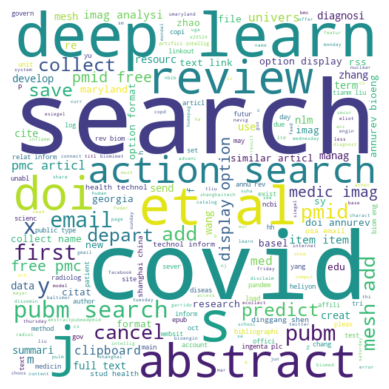

In [55]:
import pandas as pd
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# créer un nuage de mots avec la liste de mots
wordcloud = WordCloud(width=500,
                      height=500,
                      max_words=1000,
                      min_font_size=5,
                      max_font_size=200,
                      background_color="white").generate(' '.join(test_list))

# afficher le nuage de mots
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Désactiver les axes
plt.show()

**3. Analyse de sentiments** 

Dans cette partie, nous utilisons un outil comme TextBlob pour effectuer une analyse de sentiments des textes nettoyés. 

**Étapes à suivre :**

- Appliquer une fonction d’analyse de sentiment sur les textes nettoyés pour obtenir un score de polarité. 
- Visualiser la distribution des scores de sentiment à l’aide d’un histogramme. 
- Comparer les résultats obtenus avec des exemples concrets pour valider les interprétations.

In [ ]:
# https://www.clicdata.com/fr/blog/sentiment-analysis-python/

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialiser l'analyseur de sentiment
analyzer = SentimentIntensityAnalyzer()

# joindre les mots pour créer un texte
text = ' '.join(test_list)

# calculer les scores de sentiment pour le texte
sentiment_score = analyzer.polarity_scores(text)

# afficher les résultats de l'analyse de sentiment
print(sentiment_score)

{'neg': 0.01, 'neu': 0.945, 'pos': 0.045, 'compound': 0.9973}


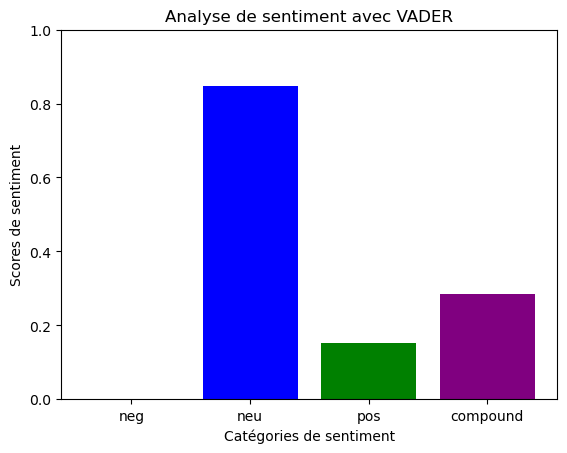

In [61]:
# préparer les données pour l'histogramme
categories = list(sentiment_score.keys())  # ['neg', 'neu', 'pos', 'compound']
scores = list(sentiment_score.values())    # Corresponding values

# créer un histogramme
plt.bar(categories, scores, color=['red', 'blue', 'green', 'purple'])

# ajouter des étiquettes et un titre
plt.xlabel('Catégories de sentiment')
plt.ylabel('Scores de sentiment')
plt.title('Analyse de sentiment avec VADER')
plt.ylim(0, 1)  # Limiter l'axe des Y à 0-1 pour plus de lisibilité

# afficher le graphique
plt.show()

In [63]:
# EXEMPLE CONCRET
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialiser l'analyseur de sentiment
analyzer = SentimentIntensityAnalyzer()

# Définir une critique pour l'analyse
review = "The room was spacious and comfortable, but the air conditioning was too loud."

# Calculer les scores de sentiment pour la critique
sentiment_score = analyzer.polarity_scores(review)

# Afficher les résultats de l'analyse de sentiment
print(sentiment_score) 

{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.2846}


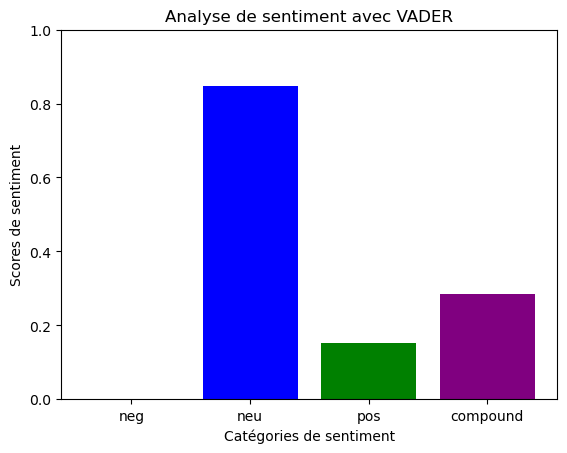

In [64]:
# préparer les données pour l'histogramme
categories = list(sentiment_score.keys())  # ['neg', 'neu', 'pos', 'compound']
scores = list(sentiment_score.values())    # Corresponding values

# créer un histogramme
plt.bar(categories, scores, color=['red', 'blue', 'green', 'purple'])

# ajouter des étiquettes et un titre
plt.xlabel('Catégories de sentiment')
plt.ylabel('Scores de sentiment')
plt.title('Analyse de sentiment avec VADER')
plt.ylim(0, 1)  # Limiter l'axe des Y à 0-1 pour plus de lisibilité

# afficher le graphique
plt.show()